In [1]:
import re
import numpy as np
import xarray as xr

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Function to format the matrix in the required Fortran style
def format_for_fortran(matrix, variable_name):
    # Iterate over the third dimension
    for k in range(matrix.shape[2]):
        for j in range(matrix.shape[1]):
            # Start of the Fortran array definition
            print(f"{variable_name}(:, {j + 1}, {k + 1}) = (/ &")
            # Iterate over the first dimension and print the values
            for i in range(0, matrix.shape[0], 7):  # 7 values per line for Fortran style
                line = "  & " + ", ".join(f"{matrix[i + offset, j, k]:.8E}_JPRB" for offset in range(min(7, matrix.shape[0] - i))) + ", &"
                print(line)
            # End of the Fortran array definition
            print("  & /)")
            print("")

In [ ]:
matrix = np.random.rand(64, 91, 12)

# Define the Fortran variable name
variable_name = "RGHG3"

# Call the function to print the matrix in Fortran style
format_for_fortran(matrix, variable_name)

In [5]:
matrix_fortran = np.asfortranarray(matrix)
matrix_fortran.tofile('matrix_data.dat')

In [4]:
cart_out = '/perm/ccff/lavori/lolipop/'

## Reading 

In [5]:
codedir = '/hpcperm/ccff/ecearth3/revisions/r7870/sources/ifs-36r4/src/'

In [6]:
# N2O
n2o_routine = codedir + 'ifs/phys_radi/su_n2oclim.F90'

# Read the Fortran routine from the text file
with open(n2o_routine, 'r') as file:
    fortran_code = file.read()

# Extract the numerical values using regular expressions
pattern = re.compile(r'[\d\.\-E]+(?=_JPRB)')
matches = pattern.findall(fortran_code)

# Convert the extracted values to float
allvals = np.array([float(value) for value in matches])

n2o_prof = allvals.reshape([12, 91, 64])

In [7]:
n2o_prof

array([[[8.9619007e-08, 8.9708664e-08, 8.9658251e-08, ...,
         9.2340329e-08, 9.2345381e-08, 9.2349836e-08],
        [8.9688704e-08, 8.9521379e-08, 8.9457409e-08, ...,
         9.2521219e-08, 9.2528524e-08, 9.2540503e-08],
        [8.9749363e-08, 8.9534325e-08, 8.9484864e-08, ...,
         9.2793016e-08, 9.2809110e-08, 9.2838420e-08],
        ...,
        [3.1799306e-07, 3.1799155e-07, 3.1798919e-07, ...,
         3.1799345e-07, 3.1799036e-07, 3.1798675e-07],
        [3.1799297e-07, 3.1799158e-07, 3.1798913e-07, ...,
         3.1799343e-07, 3.1799030e-07, 3.1798666e-07],
        [3.1799289e-07, 3.1799189e-07, 3.1798871e-07, ...,
         3.1799314e-07, 3.1799013e-07, 3.1798655e-07]],

       [[8.8938982e-08, 8.8949939e-08, 8.8947488e-08, ...,
         9.2194810e-08, 9.2194938e-08, 9.2196146e-08],
        [8.8887091e-08, 8.8837979e-08, 8.8841574e-08, ...,
         9.2225676e-08, 9.2227666e-08, 9.2229683e-08],
        [8.8909012e-08, 8.8842654e-08, 8.8850904e-08, ...,
         9.224

In [8]:
import csv

# Open the tabulated text file
with open('ifs_model_levels_L91.dat', 'r') as file:
    reader = csv.reader(file, delimiter='\t')

    # Skip the header row
    next(reader)

    # Read the 7th column
    geom_alt = np.array([float(row[6]) for row in reader])[1:]

with open('ifs_model_levels_L91.dat', 'r') as file:
    reader = csv.reader(file, delimiter='\t')

    # Skip the header row
    next(reader)

    pres = np.array([float(row[4]) for row in reader])[1:]

# Print the resulting column
print(geom_alt)

[8.030261e+04 7.358494e+04 6.943873e+04 6.551487e+04 6.179772e+04
 5.827646e+04 5.494011e+04 5.177787e+04 4.881403e+04 4.609025e+04
 4.362896e+04 4.140386e+04 3.938370e+04 3.754240e+04 3.585804e+04
 3.431209e+04 3.288877e+04 3.157356e+04 3.034538e+04 2.919477e+04
 2.811489e+04 2.709967e+04 2.614371e+04 2.524219e+04 2.439080e+04
 2.358566e+04 2.282327e+04 2.210050e+04 2.141449e+04 2.076265e+04
 2.014264e+04 1.955208e+04 1.898800e+04 1.844943e+04 1.793494e+04
 1.744191e+04 1.696691e+04 1.650676e+04 1.605863e+04 1.561991e+04
 1.518819e+04 1.476117e+04 1.433721e+04 1.391575e+04 1.349680e+04
 1.308033e+04 1.266632e+04 1.225476e+04 1.184564e+04 1.143895e+04
 1.103466e+04 1.063079e+04 1.022421e+04 9.815190e+03 9.403750e+03
 8.989900e+03 8.573660e+03 8.155040e+03 7.734060e+03 7.310730e+03
 6.885190e+03 6.457870e+03 6.031310e+03 5.609680e+03 5.196660e+03
 4.795530e+03 4.409090e+03 4.038880e+03 3.685300e+03 3.348450e+03
 3.028280e+03 2.725010e+03 2.438890e+03 2.169890e+03 1.917840e+03
 1.682800e

In [7]:
pres

array([1.0000000e-02, 2.9900000e-02, 5.6800000e-02, 1.0150000e-01,
       1.7160000e-01, 2.7680000e-01, 4.2850000e-01, 6.3960000e-01,
       9.2440000e-01, 1.2985000e+00, 1.7781000e+00, 2.3800000e+00,
       3.1209000e+00, 4.0176000e+00, 5.0860000e+00, 6.3417000e+00,
       7.7988000e+00, 9.4706000e+00, 1.1368800e+01, 1.3503700e+01,
       1.5884400e+01, 1.8517900e+01, 2.1410100e+01, 2.4565300e+01,
       2.7986000e+01, 3.1673600e+01, 3.5628100e+01, 3.9848100e+01,
       4.4331000e+01, 4.9073200e+01, 5.4070100e+01, 5.9315000e+01,
       6.4797800e+01, 7.0506100e+01, 7.6429200e+01, 8.2572500e+01,
       8.8958900e+01, 9.5617200e+01, 1.0258130e+02, 1.0989130e+02,
       1.1759420e+02, 1.2574530e+02, 1.3439810e+02, 1.4359090e+02,
       1.5335380e+02, 1.6371800e+02, 1.7471660e+02, 1.8638370e+02,
       1.9875560e+02, 2.1186970e+02, 2.2576560e+02, 2.4048440e+02,
       2.5606900e+02, 2.7256440e+02, 2.9001750e+02, 3.0847730e+02,
       3.2799480e+02, 3.4862330e+02, 3.7041820e+02, 3.9343750e

In [9]:
months = np.arange(1, 13)
ilev = pres
lats = np.linspace(-90, 90, 64)

# Build the xarray DataArray
n2o_prof_xr = xr.DataArray(n2o_prof, dims=["month", "plev", "lat"], coords={"month": months, "plev": pres, "lat": lats}, name="n2o_clim")
n2o_prof_xr.to_netcdf(cart_out + 'n2o_clim_orig.nc')

### Check original profile and profile read from netcdf in IFS

In [10]:
prova = xr.load_dataset(cart_out + 'n2o_clim_orig.nc')

In [11]:
online = np.loadtxt('/lus/h2resw01/scratch/ccff/ece3/lol0/runtime/ifsdata/N2OCLIM_check.txt')

In [12]:
online = online.reshape([12, 91, 64])

In [13]:
diff = prova['n2o_clim'] - online

In [14]:
prova['n2o_clim'].min(), prova['n2o_clim'].max()

(<xarray.DataArray 'n2o_clim' ()>
 array(8.2096292e-08),
 <xarray.DataArray 'n2o_clim' ()>
 array(3.1800499e-07))

In [15]:
online.min(), online.max()

(8.2096e-08, 3.18e-07)

In [32]:
print(diff.min(), diff.max())

<xarray.DataArray 'n2o_clim' ()>
array(-5.e-12) <xarray.DataArray 'n2o_clim' ()>
array(5.e-12)


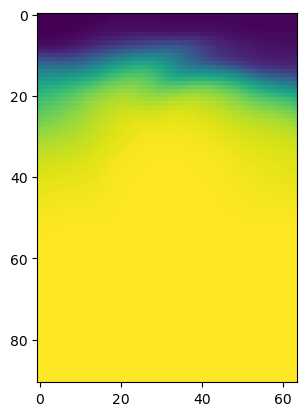

In [30]:
plt.imshow(prova['n2o_clim'][0])

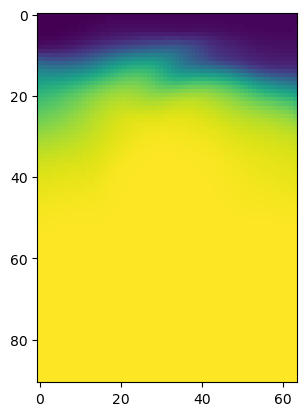

In [28]:
plt.imshow(online[0])

In [18]:
geom_alt > 10000

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [18]:
n2o_prof_clim = np.mean(n2o_prof, axis = 0)

In [115]:
n2o_prof.shape

(12, 91, 64)

In [39]:
n2o_prof_clim.shape, n2o_prof_clim[-1, :].mean()

((91, 64), 3.17994585625e-07)

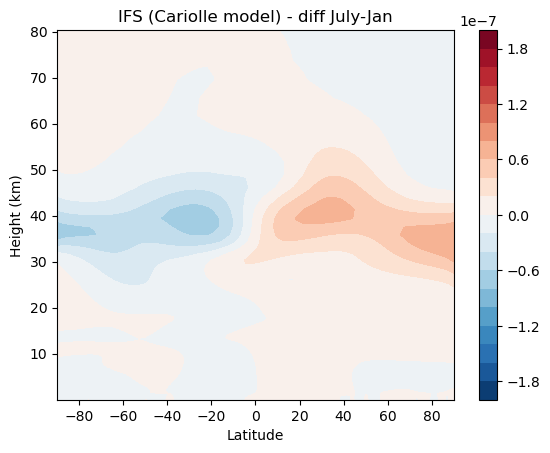

In [17]:
lat = np.linspace(-90, 90, 64)

contour = plt.contourf(lat, geom_alt/1000., n2o_prof[7, ...]-n2o_prof[0, ...], cmap = 'RdBu_r', levels = np.linspace(-2e-7, 2e-7, 21))

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('IFS (Cariolle model) - diff July-Jan')

plt.savefig(cart_out + 'map_n2o_IFS_seasvar.pdf')

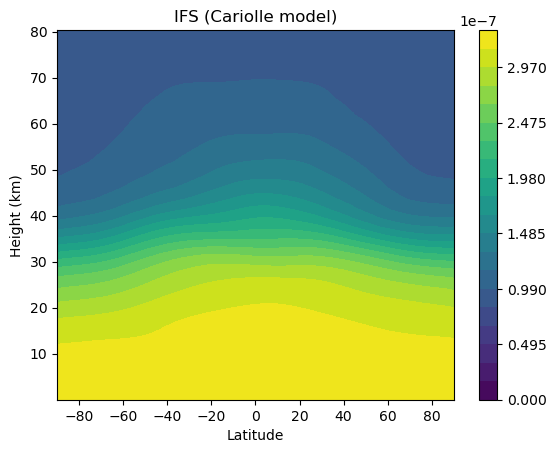

In [19]:
lat = np.linspace(-90, 90, 64)

contour = plt.contourf(lat, geom_alt/1000., n2o_prof_clim, cmap='viridis', levels = np.linspace(0., 3.3e-7, 21), vmin = 0., vmax = 3.3e-7)

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('IFS (Cariolle model)')

plt.savefig(cart_out + 'map_n2o_IFS.pdf')
#plt.imshow(n2o_prof[0, ...])
#plt.colorbar()

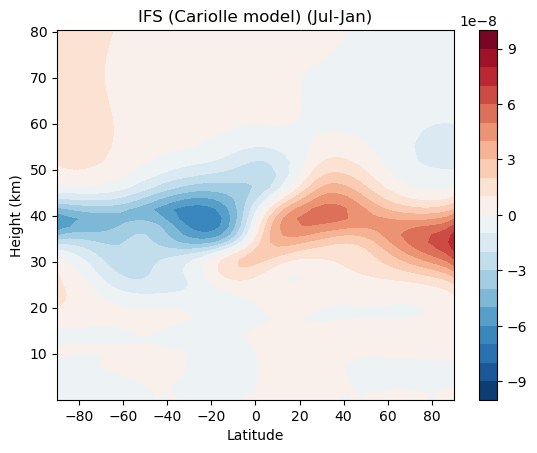

In [39]:
lat = np.linspace(-90, 90, 64)

contour = plt.contourf(lat, geom_alt/1000., n2o_prof[6]-n2o_prof[0], cmap='RdBu_r', levels = np.linspace(-1e-7, 1e-7, 21), vmin = -1e-7, vmax = 1e-7)

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('IFS (Cariolle model) (Jul-Jan)')

plt.savefig(cart_out + 'map_n2o_seascycle_IFS.pdf')
#plt.imshow(n2o_prof[0, ...])
#plt.colorbar()

In [11]:
pres

array([], dtype=float64)

In [20]:
### As in Meinshausen 2017
p_trop = 250. - 150. * np.cos(np.deg2rad(lat))

s_exp = np.zeros(len(lat))
s_exp[np.abs(lat) <= 45] = 0.3478 + 0.00116 * np.abs(lat)[np.abs(lat) <= 45]
s_exp[np.abs(lat) > 45] = 0.40 + 0.013333 * (np.abs(lat)[np.abs(lat) > 45] - 45)

n2o_m20 = np.ones(n2o_prof_clim.shape)*n2o_prof_clim[-1, :].mean()
n2o_m20 = n2o_m20 * (pres[:, np.newaxis]/p_trop[np.newaxis, :])**s_exp[np.newaxis, :]
n2o_m20[pres[:, np.newaxis] > p_trop[np.newaxis, :]] = n2o_prof_clim[-1, :].mean()

In [21]:
### Adding a minimum in mesosphere
n2o_m20_mm = np.ones(n2o_prof_clim.shape)*n2o_prof_clim[0, :].mean()
n2o_m20_mm = n2o_m20_mm + (n2o_prof_clim[-1, :] - n2o_prof_clim[0, :]) * (pres[:, np.newaxis]/p_trop[np.newaxis, :])**s_exp[np.newaxis, :]
n2o_m20_mm[pres[:, np.newaxis] > p_trop[np.newaxis, :]] = n2o_prof_clim[-1, :].mean()

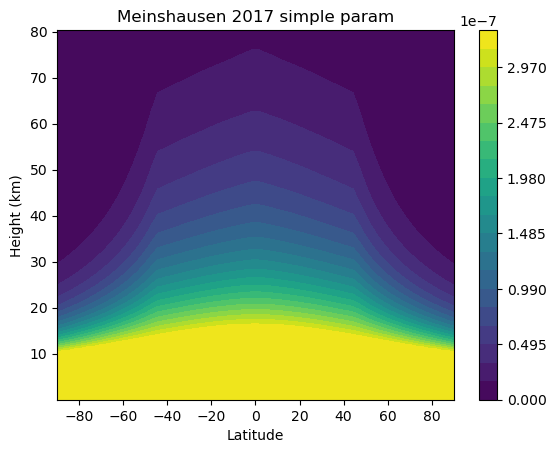

In [22]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_m20, cmap='viridis', levels = contour.levels, vmin = 0., vmax = 3.3e-7)

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('Meinshausen 2017 simple param')

plt.savefig(cart_out + 'map_n2o_mein17.pdf')

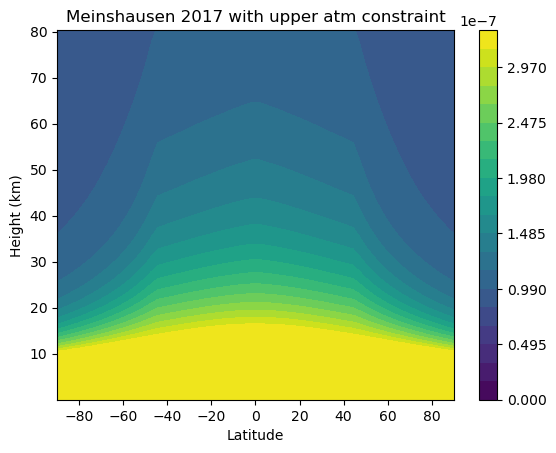

In [107]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_m20_mm, cmap='viridis', levels = contour.levels, vmin = 0., vmax = 3.3e-7)

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('Meinshausen 2017 with upper atm constraint')

plt.savefig(cart_out + 'map_n2o_mein17_wuc.pdf')

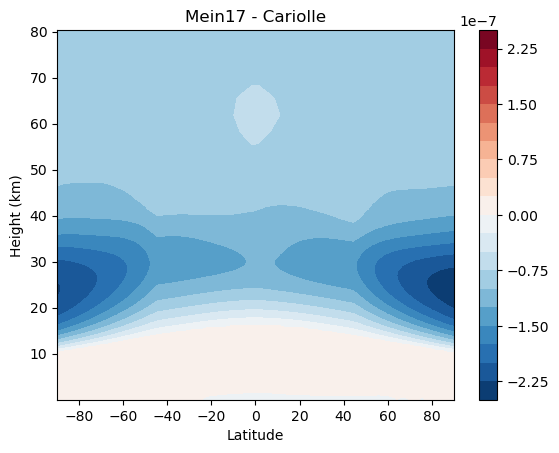

In [23]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_m20 - n2o_prof_clim, cmap='RdBu_r', levels = np.linspace(-2.5e-7, 2.5e-7, 21))

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('Mein17 - Cariolle')

plt.savefig(cart_out + 'map_n2o_IFS-mein17.pdf')

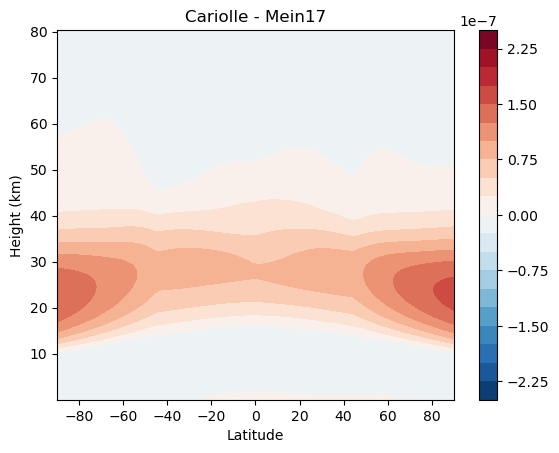

In [109]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_prof_clim - n2o_m20_mm, cmap='RdBu_r', levels = np.linspace(-2.5e-7, 2.5e-7, 21))

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('Cariolle - Mein17')

plt.savefig(cart_out + 'map_n2o_IFS-mein17wuc.pdf')

In [36]:
n2o_waccm = xr.open_dataset('/etc/ecmwf/nfs/dh1_perm_b/ccff/lavori/lolipop/n2o_waccm_90-14clim.nc')

In [37]:
n2o_waccm

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 288, lat: 192, lev: 70)
Coordinates:
  * time       (time) object 2014-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev        (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lev_bnds   (lev, bnds) float64 ...
    n2o        (time, lev, lat, lon) float32 ...
    ps         (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 2.4.0 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research, Climate...
    activity_id:            CMIP
    branch_method:          no parent
    ...                     ...
    tracking_id:            hdl:21.14100/e1c15d24-034e-4de7-a13d-8cdad713fa97
    variable_id:            n2o
    variant_info:           CMIP6 CESM2 AMIP hindcast (1950-2014) with high-t...
    variant_label:          r2i1p1f1
    history:                Mon Jul 22 12:29:48 2024: cdo -ymonmean -selyear,...
    CDO:                    Climate Data Operators version 2.4.0 (https://mpi...

In [ ]:
n2o_waccm['n2o']

In [57]:
n2o_waccm.lev

<xarray.DataArray 'lev' (lev: 70)>
array([-5.960300e-06, -9.826900e-06, -1.620185e-05, -2.671225e-05,
       -4.404100e-05, -7.261275e-05, -1.197190e-04, -1.973800e-04,
       -3.254225e-04, -5.365325e-04, -8.846025e-04, -1.458457e-03,
       -2.404575e-03, -3.978250e-03, -6.556826e-03, -1.081383e-02,
       -1.789800e-02, -2.955775e-02, -4.873075e-02, -7.991075e-02,
       -1.282732e-01, -1.981200e-01, -2.920250e-01, -4.101675e-01,
       -5.534700e-01, -7.304800e-01, -9.559475e-01, -1.244795e+00,
       -1.612850e+00, -2.079325e+00, -2.667425e+00, -3.404875e+00,
       -4.324575e+00, -5.465400e+00, -6.872850e+00, -8.599725e+00,
       -1.070705e+01, -1.326475e+01, -1.635175e+01, -2.005675e+01,
       -2.447900e+01, -2.972800e+01, -3.592325e+01, -4.319375e+01,
       -5.167750e+01, -6.152050e+01, -7.375096e+01, -8.782123e+01,
       -1.033171e+02, -1.215472e+02, -1.429940e+02, -1.682251e+02,
       -1.979081e+02, -2.328286e+02, -2.739108e+02, -3.222419e+02,
       -3.791009e+02, -4.459926e+02, -5.246872e+02, -6.097787e+02,
       -6.913894e+02, -7.634045e+02, -8.208584e+02, -8.595348e+02,
       -8.870202e+02, -9.126445e+02, -9.361984e+02, -9.574855e+02,
       -9.763254e+02, -9.925561e+02])
Coordinates:
  * lev      (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6
Attributes:
    standard_name:  alevel
    long_name:      pressure
    units:          hPa
    positive:       up
    axis:           Z
    bounds:         lev_bnds
    title:          atmospheric model level
    type:           double

In [43]:
n2o_waccm_clim = n2o_waccm['n2o'].mean(['time', 'lon']).compute()

In [44]:
n2o_waccm_seas = n2o_waccm['n2o'].mean('lon')

In [45]:
n2o_waccm_seas

<xarray.DataArray 'n2o' (time: 12, lev: 70, lat: 192)>
array([[[7.23896247e-12, 7.24119159e-12, 7.24611733e-12, ...,
         1.34741784e-11, 1.34524041e-11, 1.34420712e-11],
        [9.39774560e-12, 9.40092535e-12, 9.40984530e-12, ...,
         1.74150347e-11, 1.73843925e-11, 1.73656835e-11],
        [1.18034072e-11, 1.18078585e-11, 1.18149379e-11, ...,
         2.22991955e-11, 2.22701579e-11, 2.22464946e-11],
        ...,
        [3.16882819e-07, 3.16908768e-07, 3.16929942e-07, ...,
         3.17723988e-07, 3.17727313e-07, 3.17728478e-07],
        [3.16479941e-07, 3.16511347e-07, 3.16540877e-07, ...,
         3.17618543e-07, 3.17622067e-07, 3.17623147e-07],
        [3.15981566e-07, 3.15982533e-07, 3.15983016e-07, ...,
         3.17427606e-07, 3.17427521e-07, 3.17427322e-07]],

       [[1.55754090e-11, 1.55793278e-11, 1.55886016e-11, ...,
         1.51017376e-11, 1.50761140e-11, 1.50634765e-11],
        [2.02080401e-11, 2.02168560e-11, 2.02383596e-11, ...,
         1.94749980e-11, 1.94394171e-11, 1.94160677e-11],
        [2.55342674e-11, 2.55513909e-11, 2.55773458e-11, ...,
         2.47662047e-11, 2.47330576e-11, 2.47061711e-11],
...
        [3.17728876e-07, 3.17740813e-07, 3.17748487e-07, ...,
         3.18115525e-07, 3.18119646e-07, 3.18119788e-07],
        [3.17339186e-07, 3.17376021e-07, 3.17405778e-07, ...,
         3.17997660e-07, 3.18001611e-07, 3.18001923e-07],
        [3.16663574e-07, 3.16664341e-07, 3.16664767e-07, ...,
         3.17766791e-07, 3.17766734e-07, 3.17766535e-07]],

       [[7.05689673e-12, 7.05891205e-12, 7.06256364e-12, ...,
         1.40404693e-11, 1.40218488e-11, 1.40132567e-11],
        [9.14054856e-12, 9.14273431e-12, 9.14883880e-12, ...,
         1.81521430e-11, 1.81279384e-11, 1.81118454e-11],
        [1.14208842e-11, 1.14245280e-11, 1.14303827e-11, ...,
         2.32972183e-11, 2.32694610e-11, 2.32478446e-11],
        ...,
        [3.17519437e-07, 3.17547347e-07, 3.17569629e-07, ...,
         3.18308850e-07, 3.18310754e-07, 3.18312289e-07],
        [3.17168286e-07, 3.17199579e-07, 3.17228967e-07, ...,
         3.18196385e-07, 3.18198317e-07, 3.18199113e-07],
        [3.16730024e-07, 3.16730876e-07, 3.16731331e-07, ...,
         3.18004339e-07, 3.18004169e-07, 3.18003970e-07]]], dtype=float32)
Coordinates:
  * time     (time) object 2014-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6

In [11]:
n2o_waccm_clim

<xarray.DataArray 'n2o' (lev: 70, lat: 192)>
array([[1.4366515e-11, 1.4371757e-11, 1.4386109e-11, ..., 1.8054790e-11,
        1.8027260e-11, 1.8012860e-11],
       [1.8645458e-11, 1.8659175e-11, 1.8692008e-11, ..., 2.3226794e-11,
        2.3185417e-11, 2.3158130e-11],
       [2.3913206e-11, 2.3937042e-11, 2.3976853e-11, ..., 2.9025397e-11,
        2.8975610e-11, 2.8941179e-11],
       ...,
       [3.1732682e-07, 3.1733646e-07, 3.1734220e-07, ..., 3.1779484e-07,
        3.1779692e-07, 3.1779692e-07],
       [3.1695797e-07, 3.1699784e-07, 3.1702962e-07, ..., 3.1770358e-07,
        3.1770554e-07, 3.1770540e-07],
       [3.1616881e-07, 3.1616958e-07, 3.1616986e-07, ..., 3.1755170e-07,
        3.1755167e-07, 3.1755158e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6

In [40]:
from scipy.interpolate import interp1d

In [58]:
def log_interp(new_levels, pressure, data, v_axis = -1):
    print(new_levels.shape, pressure.shape, data.shape)
    log_p = np.log(pressure)
    f = interp1d(log_p, data, axis=v_axis, bounds_error=False, fill_value="extrapolate")
    return f(np.log(new_levels))

In [26]:
alt_pres = interp1d(np.log(pres), geom_alt, fill_value="extrapolate")

In [27]:
galt_waccm = alt_pres(np.log(-n2o_waccm_clim.lev))

In [44]:
n2o_waccm_clim

<xarray.DataArray 'n2o' (lev: 70, lat: 192)>
array([[1.4366515e-11, 1.4371757e-11, 1.4386109e-11, ..., 1.8054790e-11,
        1.8027260e-11, 1.8012860e-11],
       [1.8645458e-11, 1.8659175e-11, 1.8692008e-11, ..., 2.3226794e-11,
        2.3185417e-11, 2.3158130e-11],
       [2.3913206e-11, 2.3937042e-11, 2.3976853e-11, ..., 2.9025397e-11,
        2.8975610e-11, 2.8941179e-11],
       ...,
       [3.1732682e-07, 3.1733646e-07, 3.1734220e-07, ..., 3.1779484e-07,
        3.1779692e-07, 3.1779692e-07],
       [3.1695797e-07, 3.1699784e-07, 3.1702962e-07, ..., 3.1770358e-07,
        3.1770554e-07, 3.1770540e-07],
       [3.1616881e-07, 3.1616958e-07, 3.1616986e-07, ..., 3.1755170e-07,
        3.1755167e-07, 3.1755158e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6

In [46]:
n2o_waccm_clim.lev

<xarray.DataArray 'lev' (lev: 70)>
array([-5.960300e-06, -9.826900e-06, -1.620185e-05, -2.671225e-05,
       -4.404100e-05, -7.261275e-05, -1.197190e-04, -1.973800e-04,
       -3.254225e-04, -5.365325e-04, -8.846025e-04, -1.458457e-03,
       -2.404575e-03, -3.978250e-03, -6.556826e-03, -1.081383e-02,
       -1.789800e-02, -2.955775e-02, -4.873075e-02, -7.991075e-02,
       -1.282732e-01, -1.981200e-01, -2.920250e-01, -4.101675e-01,
       -5.534700e-01, -7.304800e-01, -9.559475e-01, -1.244795e+00,
       -1.612850e+00, -2.079325e+00, -2.667425e+00, -3.404875e+00,
       -4.324575e+00, -5.465400e+00, -6.872850e+00, -8.599725e+00,
       -1.070705e+01, -1.326475e+01, -1.635175e+01, -2.005675e+01,
       -2.447900e+01, -2.972800e+01, -3.592325e+01, -4.319375e+01,
       -5.167750e+01, -6.152050e+01, -7.375096e+01, -8.782123e+01,
       -1.033171e+02, -1.215472e+02, -1.429940e+02, -1.682251e+02,
       -1.979081e+02, -2.328286e+02, -2.739108e+02, -3.222419e+02,
       -3.791009e+02, -4.459926e+02, -5.246872e+02, -6.097787e+02,
       -6.913894e+02, -7.634045e+02, -8.208584e+02, -8.595348e+02,
       -8.870202e+02, -9.126445e+02, -9.361984e+02, -9.574855e+02,
       -9.763254e+02, -9.925561e+02])
Coordinates:
  * lev      (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6
Attributes:
    standard_name:  alevel
    long_name:      pressure
    units:          hPa
    positive:       up
    axis:           Z
    bounds:         lev_bnds
    title:          atmospheric model level
    type:           double

In [52]:
pres

array([1.0000000e-02, 2.9900000e-02, 5.6800000e-02, 1.0150000e-01,
       1.7160000e-01, 2.7680000e-01, 4.2850000e-01, 6.3960000e-01,
       9.2440000e-01, 1.2985000e+00, 1.7781000e+00, 2.3800000e+00,
       3.1209000e+00, 4.0176000e+00, 5.0860000e+00, 6.3417000e+00,
       7.7988000e+00, 9.4706000e+00, 1.1368800e+01, 1.3503700e+01,
       1.5884400e+01, 1.8517900e+01, 2.1410100e+01, 2.4565300e+01,
       2.7986000e+01, 3.1673600e+01, 3.5628100e+01, 3.9848100e+01,
       4.4331000e+01, 4.9073200e+01, 5.4070100e+01, 5.9315000e+01,
       6.4797800e+01, 7.0506100e+01, 7.6429200e+01, 8.2572500e+01,
       8.8958900e+01, 9.5617200e+01, 1.0258130e+02, 1.0989130e+02,
       1.1759420e+02, 1.2574530e+02, 1.3439810e+02, 1.4359090e+02,
       1.5335380e+02, 1.6371800e+02, 1.7471660e+02, 1.8638370e+02,
       1.9875560e+02, 2.1186970e+02, 2.2576560e+02, 2.4048440e+02,
       2.5606900e+02, 2.7256440e+02, 2.9001750e+02, 3.0847730e+02,
       3.2799480e+02, 3.4862330e+02, 3.7041820e+02, 3.9343750e

In [61]:
n2o_waccm_seas.shape

(12, 70, 192)

In [64]:
(-n2o_waccm.lev).shape

(70,)

In [71]:
n2o_waccm_seas_ok = n2o_waccm_seas.interp(lat = n2o_prof_xr.lat)

In [73]:
n2o_waccm_seas_ogrid = xr.apply_ufunc(log_interp, pres, -n2o_waccm.lev.values, n2o_waccm_seas_ok.values, kwargs = {'v_axis': 1})

(91,) (70,) (12, 70, 64)


In [75]:
n2o_waccm_seas_ogrid.shape

(12, 91, 64)

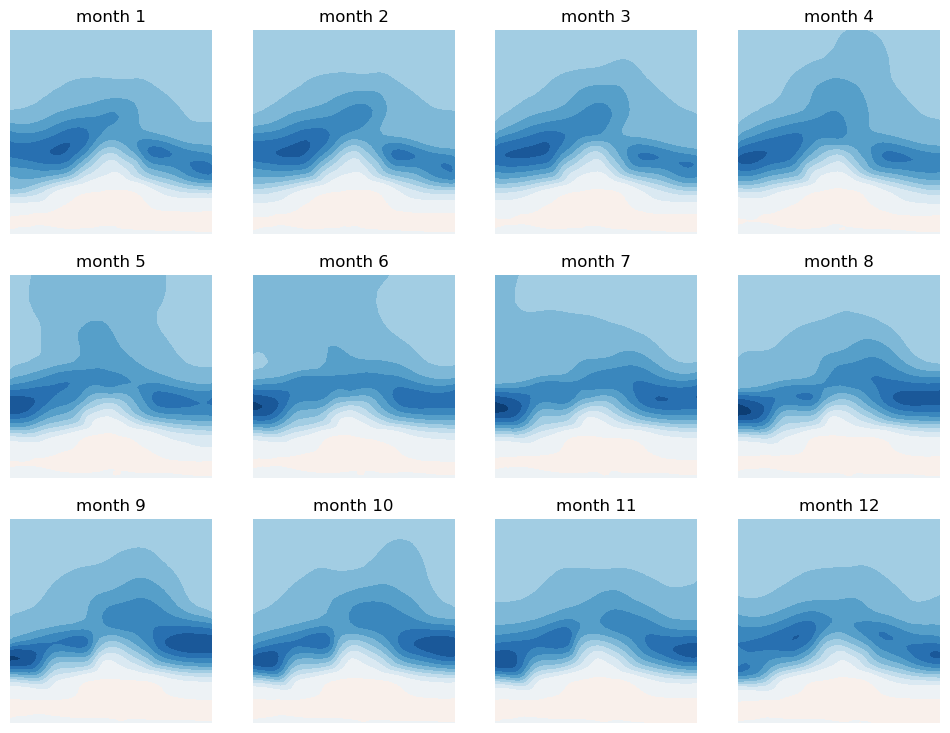

In [82]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

for i in range(12):
    contour2 = axes[i].contourf(lat, geom_alt/1000., n2o_waccm_seas_ogrid[i] - n2o_prof[i], cmap='RdBu_r', levels = np.linspace(-2.5e-7, 2.5e-7, 21))
    #im = axes[i].imshow(n2o_waccm_seas_ogrid[i] - n2o_prof[i], cmap='RdBu_r', vmin = -1e-7, vmax = 1e-7)
    axes[i].axis('off')  # Optionally turn off axis ticks
    axes[i].set_title(f'month {i+1}')

fig.savefig(cart_out + 'waccm_ifs_diff.pdf')



In [83]:
months = np.arange(1, 13)
ilev = pres
lats = np.linspace(-90, 90, 64)

# Build the xarray DataArray
n2o_prof_waccm_xr = xr.DataArray(n2o_waccm_seas_ogrid, dims=["month", "plev", "lat"], coords={"month": months, "plev": pres, "lat": lats}, name="n2o_clim")
n2o_prof_waccm_xr.to_netcdf(cart_out + 'n2o_clim_waccm.nc')

In [93]:
n2o_prof_xr.sel(plev = slice(200., 1000.)).mean()

<xarray.DataArray 'n2o_clim' ()>
array(3.178054e-07)

In [94]:
n2o_prof_waccm_xr.sel(plev = slice(200., 1000.)).mean()

<xarray.DataArray 'n2o_clim' ()>
array(3.17484262e-07)

In [45]:
n2o_waccm_clim['lev'] = -n2o_waccm_clim.lev

In [46]:
n2o_waccm_clim

<xarray.DataArray 'n2o' (lev: 70, lat: 192)>
array([[1.4366515e-11, 1.4371757e-11, 1.4386109e-11, ..., 1.8054790e-11,
        1.8027260e-11, 1.8012860e-11],
       [1.8645458e-11, 1.8659175e-11, 1.8692008e-11, ..., 2.3226794e-11,
        2.3185417e-11, 2.3158130e-11],
       [2.3913206e-11, 2.3937042e-11, 2.3976853e-11, ..., 2.9025397e-11,
        2.8975610e-11, 2.8941179e-11],
       ...,
       [3.1732682e-07, 3.1733646e-07, 3.1734220e-07, ..., 3.1779484e-07,
        3.1779692e-07, 3.1779692e-07],
       [3.1695797e-07, 3.1699784e-07, 3.1702962e-07, ..., 3.1770358e-07,
        3.1770554e-07, 3.1770540e-07],
       [3.1616881e-07, 3.1616958e-07, 3.1616986e-07, ..., 3.1755170e-07,
        3.1755167e-07, 3.1755158e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6

In [59]:
def plot_contourf(data, title = '', oklat = None, filename = None):
    fig = plt.figure()
    if oklat is None:
        oklat = lat
    contourw = plt.contourf(oklat, geom_alt/1000., data, levels = contour.levels, vmin = 0., vmax = 3.3e-7)

    # plt.yscale('log')
    # plt.gca().invert_yaxis()
    # Add a colorbar
    plt.colorbar(contourw)

    # Set labels for the axes
    plt.xlabel('Latitude')
    plt.ylabel('Altitude (km)')
    plt.title(title)

    if filename is not None:
        plt.savefig(cart_out + 'map_n2o_waccm_vhi.pdf')
    
    return

In [61]:
n2o_waccm_clim_vintrp = n2o_waccm_clim.interp(lev = pres)

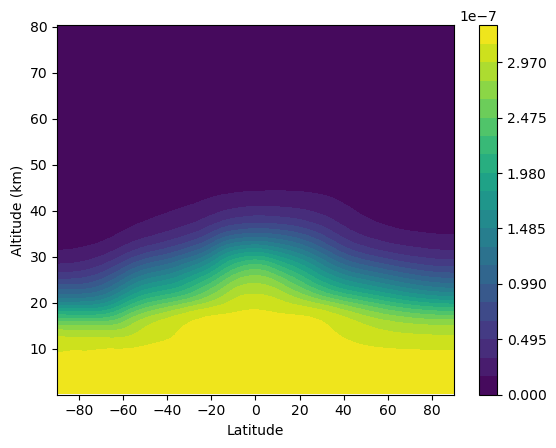

In [62]:
plot_contourf(n2o_waccm_clim_vintrp, oklat = n2o_waccm_clim_vintrp.lat)

In [63]:
n2o_waccm_clim_vhintrp = n2o_waccm_clim_vintrp.interp(lat = lat)

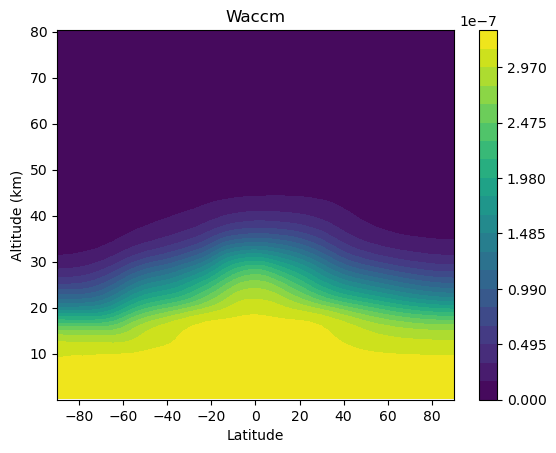

In [64]:
fig = plt.figure()
contourw = plt.contourf(lat, geom_alt/1000., n2o_waccm_clim_vhintrp, levels = contour.levels, vmin = 0., vmax = 3.3e-7)

# plt.yscale('log')
# plt.gca().invert_yaxis()
# Add a colorbar
plt.colorbar(contourw)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Altitude (km)')
plt.title('Waccm')

plt.savefig(cart_out + 'map_n2o_waccm_vhi.pdf')

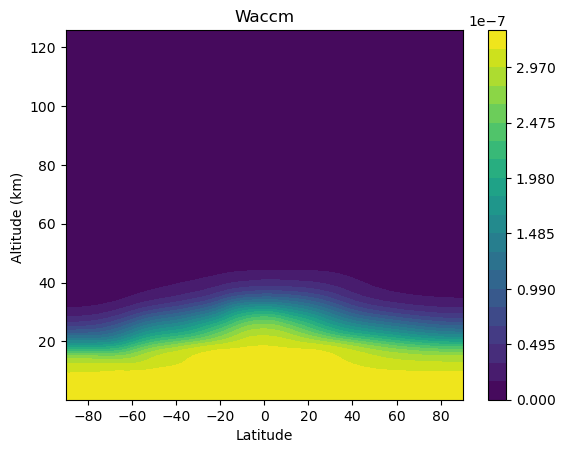

In [42]:
fig = plt.figure()
contourw = plt.contourf(n2o_waccm_clim.lat, galt_waccm/1000., n2o_waccm_clim, levels = contour.levels, vmin = 0., vmax = 3.3e-7)

# plt.yscale('log')
# plt.gca().invert_yaxis()
# Add a colorbar
plt.colorbar(contourw)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Altitude (km) ')
plt.title('Waccm')

plt.savefig(cart_out + 'map_n2o_waccm.pdf')

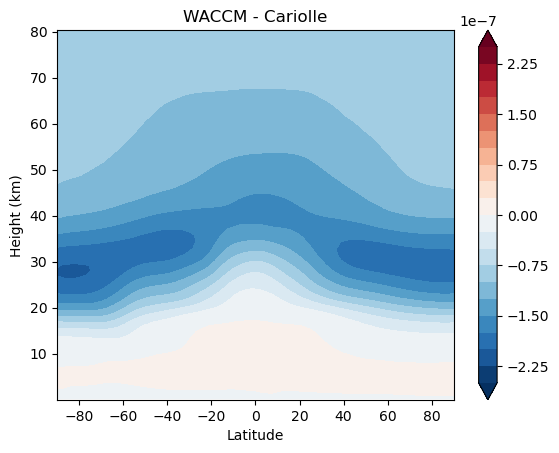

In [65]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_waccm_clim_vhintrp - n2o_prof_clim, cmap='RdBu_r', levels = np.linspace(-2.5e-7, 2.5e-7, 21), extend = 'both')

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('WACCM - Cariolle')

plt.savefig(cart_out + 'map_n2o_WACCM-IFS.pdf')

In [ ]:
fig = plt.figure()
contour2 = plt.contourf(lat, geom_alt/1000., n2o_prof_clim - n2o_m20, cmap='RdBu_r', levels = np.linspace(-2.5e-7, 2.5e-7, 21))

# Add a colorbar
plt.colorbar(contour2)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')
plt.title('Cariolle - Mein17')

plt.savefig(cart_out + 'map_n2o_IFS-mein17.pdf')

### EC-Earth4 profile

In [76]:
n2o_ece4_file = '/ec/res4/hpcperm/ccff/ecearth4/src/main/sources/oifs-43r3v2/t21test/ifsdata/N2OCLIM'

In [92]:
# Define the dimensions of the matrix
dims = (64, 91, 12)

# Define the data type
dtype = np.float64  # assuming the Fortran code writes double precision floats

# Open the binary file
with open(n2o_ece4_file, 'rb') as f:
    # Read the data from the file
    # Fortran writes record markers at the beginning and end of each record, so we need to skip those
    record_size = np.prod(dims) * np.dtype(dtype).itemsize
    f.seek(4)  # Skip the first record marker (4 bytes for the size of the record)
    data = np.fromfile(f, dtype=dtype, count=np.prod(dims))
    data = data.reshape(dims, order='F')  # Fortran arrays are column-major

print(data.min(), data.max(), np.nanmax(data), np.nanmin(data))

nan nan 1.6649312839688966e+308 -1.6328440138045205e+308


In [96]:
# Define the dimensions of the matrix
dims = (64, 91, 12)

# Define the data type based on Fortran's SELECTED_REAL_KIND(13,300)
dtype = np.float64  # 8-byte floating-point number

# Open the binary file
with open(n2o_ece4_file, 'rb') as f:
    # Read the first record marker (4 bytes, indicating the record length)
    start_marker = np.fromfile(f, dtype=np.int32, count=1)[0]
    
    # Calculate the expected record size
    num_elements = np.prod(dims)
    expected_record_size = num_elements * np.dtype(dtype).itemsize

    # Verify the start marker matches the expected record size
    if start_marker != expected_record_size:
        raise ValueError(f"Unexpected start marker size: {start_marker}, expected: {expected_record_size}")
    
    # Read the data from the file
    data = np.fromfile(f, dtype=dtype, count=num_elements)
    
    # Read the end record marker (4 bytes)
    end_marker = np.fromfile(f, dtype=np.int32, count=1)[0]
    
    # Verify the end marker matches the expected record size
    if end_marker != expected_record_size:
        raise ValueError(f"Unexpected end marker size: {end_marker}, expected: {expected_record_size}")

    # Reshape the data to the correct dimensions (Fortran arrays are column-major)
    data = data.reshape(dims, order='F')

ValueError: Unexpected start marker size: 8914944, expected: 559104

3578240

In [95]:
from scipy.io import FortranFile

f = open(n2o_ece4_file, 'rb')
data = f.read()

print(data.min(), data.max())
# with open(n2o_ece4_file, 'rb') as f:
#     pino = np.fromfile(f, dtype = dtype)

AttributeError: 'bytes' object has no attribute 'astype'

In [87]:
np.nanmax(data), np.nanmax(pino)

(3.39802e+38, 3.39802e+38)

### N2O profiles

In [66]:
trop_prof = np.mean(n2o_prof_clim[:, np.abs(lat) < 30], axis = 1)
npole_prof = np.mean(n2o_prof_clim[:, lat > 60], axis = 1)
nml_prof = np.mean(n2o_prof_clim[:, (lat < 60) & (lat > 30)], axis = 1)

In [69]:
trop_prof_waccm = np.mean(n2o_waccm_clim[:, np.abs(n2o_waccm_clim.lat) < 30], axis = 1)
npole_prof_waccm = np.mean(n2o_waccm_clim[:, n2o_waccm_clim.lat > 60], axis = 1)
nml_prof_waccm = np.mean(n2o_waccm_clim[:, (n2o_waccm_clim.lat < 60) & (n2o_waccm_clim.lat > 30)], axis = 1)

In [71]:
trop_prof_m20 = np.mean(n2o_m20[:, np.abs(lat) < 30], axis = 1)
npole_prof_m20 = np.mean(n2o_m20[:, lat > 60], axis = 1)
nml_prof_m20 = np.mean(n2o_m20[:, (lat < 60) & (lat > 30)], axis = 1)

In [71]:
trop_prof_m20_mm = np.mean(n2o_m20_mm[:, np.abs(lat) < 30], axis = 1)
npole_prof_m20_mm = np.mean(n2o_m20_mm[:, lat > 60], axis = 1)
nml_prof_m20_mm = np.mean(n2o_m20_mm[:, (lat < 60) & (lat > 30)], axis = 1)

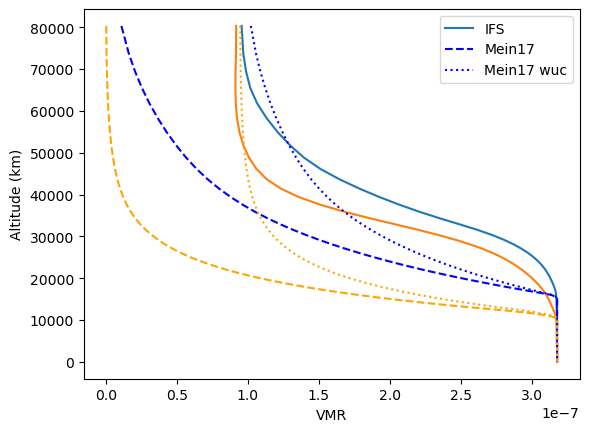

In [113]:
plt.figure()
plt.plot(trop_prof, geom_alt, label = 'IFS')
plt.plot(npole_prof, geom_alt)
#plt.plot(nml_prof, geom_alt)
# plt.ylim(9000., 20000.)
# plt.xlim(3.e-7, 3.3e-7)

plt.plot(trop_prof_m20, geom_alt, color = 'blue', ls = '--', label = 'Mein17')
plt.plot(npole_prof_m20, geom_alt, color = 'orange', ls = '--')
#plt.plot(nml_prof_m20, geom_alt, color = 'green', ls = '--')

plt.plot(trop_prof_m20_mm, geom_alt, color = 'blue', ls = ':', label = 'Mein17 wuc')
plt.plot(npole_prof_m20_mm, geom_alt, color = 'orange', ls = ':')
#plt.plot(nml_prof_m20_mm, geom_alt, color = 'green', ls = ':')

plt.legend()
plt.xlabel('VMR')
plt.ylabel('Altitude (km)')
#plt.plot(trop_prof * (1+err_ok), geom_alt, color = 'blue', ls = ':')
#plt.plot(trop_prof * (1-err_ok), geom_alt, color = 'blue', ls = ':')
#plt.plot(nuprof, geom_alt)

plt.savefig(cart_out + 'prof_n2o_diff.pdf')

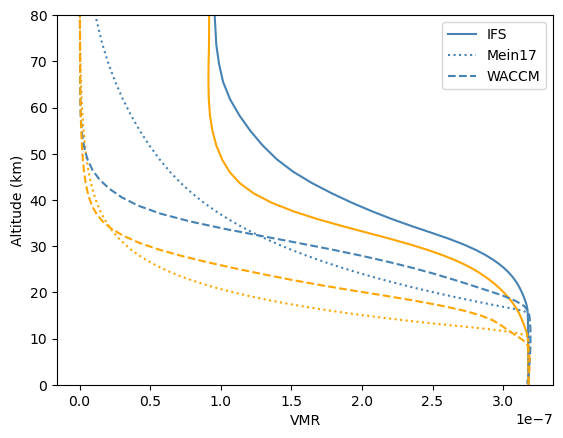

In [75]:
plt.figure()
plt.plot(trop_prof, geom_alt/1000., color = 'steelblue', label = 'IFS')
plt.plot(npole_prof, geom_alt/1000., color = 'orange')
#plt.plot(nml_prof, geom_alt)
# plt.ylim(9000., 20000.)
# plt.xlim(3.e-7, 3.3e-7)

plt.plot(trop_prof_m20, geom_alt/1000., color = 'steelblue', ls = ':', label = 'Mein17')
plt.plot(npole_prof_m20, geom_alt/1000., color = 'orange', ls = ':')
#plt.plot(nml_prof_m20, geom_alt, color = 'green', ls = '--')

plt.plot(trop_prof_waccm, galt_waccm/1000., color = 'steelblue', ls = '--', label = 'WACCM')
plt.plot(npole_prof_waccm, galt_waccm/1000., color = 'orange', ls = '--')
#plt.plot(nml_prof_m20_mm, geom_alt, color = 'green', ls = ':')

plt.ylim(0, 80.)

plt.legend()
plt.xlabel('VMR')
plt.ylabel('Altitude (km)')
#plt.plot(trop_prof * (1+err_ok), geom_alt, color = 'blue', ls = ':')
#plt.plot(trop_prof * (1-err_ok), geom_alt, color = 'blue', ls = ':')
#plt.plot(nuprof, geom_alt)

plt.savefig(cart_out + 'prof_n2o_diff_ww.pdf')

# CFC11

In [81]:
# CFC11
cfc11_routine = '/hpcperm/ccff/ecearth3/revisions/r7870/sources/ifs-36r4/src/ifs/phys_radi/su_c11clim.F90'

# Read the Fortran routine from the text file
with open(cfc11_routine, 'r') as file:
    fortran_code = file.read()

# Extract the numerical values using regular expressions
pattern = re.compile(r'[\d\.\-E]+(?=_JPRB)')
matches = pattern.findall(fortran_code)

# Convert the extracted values to float
allvals = np.array([float(value) for value in matches])

cfc11_prof = allvals.reshape([12, 91, 64])

cfc11_prof_clim = np.mean(cfc11_prof, axis = 0)

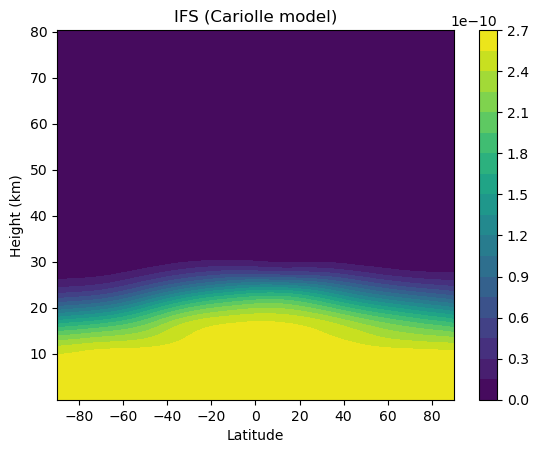

In [110]:
contour = plt.contourf(lat, geom_alt/1000., cfc11_prof_clim, cmap='viridis', levels = 20)

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')

plt.title('IFS (Cariolle model)')

plt.savefig(cart_out + 'map_cfc11_IFS.pdf')

In [86]:
### As in Meinshausen 2017
p_trop = 250. - 150. * np.cos(np.deg2rad(lat))

s_exp = np.zeros(len(lat))
s_exp[np.abs(lat) <= 45] = 0.7273 + 0.00606 * np.abs(lat)[np.abs(lat) <= 45]
s_exp[np.abs(lat) > 45] = 1. + 0.013333 * (np.abs(lat)[np.abs(lat) > 45] - 45)

cfc11_m20 = np.ones(cfc11_prof_clim.shape)*cfc11_prof_clim[-1, :].mean()
cfc11_m20 = cfc11_m20 * (pres[:, np.newaxis]/p_trop[np.newaxis, :])**s_exp[np.newaxis, :]
cfc11_m20[pres[:, np.newaxis] > p_trop[np.newaxis, :]] = cfc11_prof_clim[-1, :].mean()

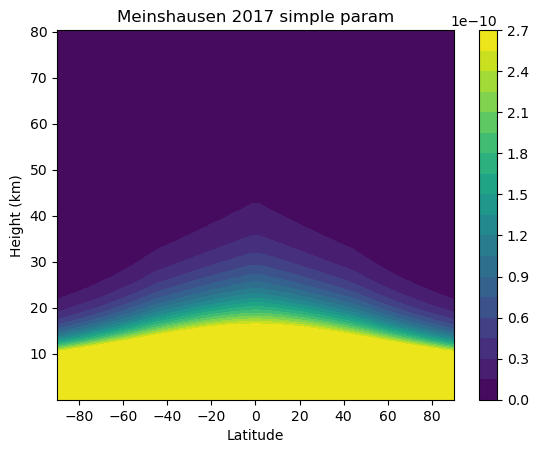

In [111]:
contour = plt.contourf(lat, geom_alt/1000., cfc11_m20, cmap='viridis', levels = 20)

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')

plt.title('Meinshausen 2017 simple param')

plt.savefig(cart_out + 'map_cfc11_Mein17.pdf')

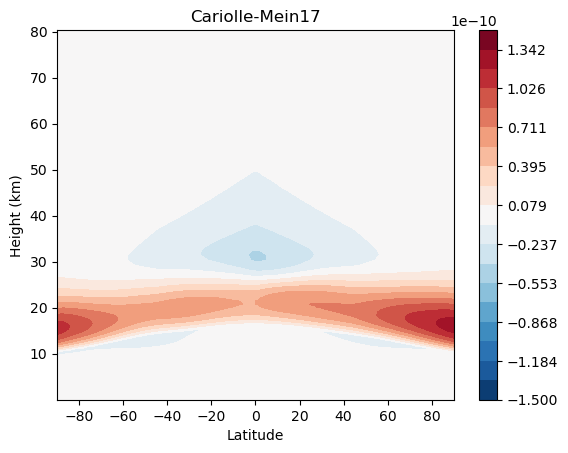

In [112]:
contour = plt.contourf(lat, geom_alt/1000., cfc11_prof_clim - cfc11_m20, cmap='RdBu_r', levels = np.linspace(-1.5e-10, 1.5e-10, 20))

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')

plt.title('Cariolle-Mein17')

plt.savefig(cart_out + 'map_cfc11_IFS-Mein17.pdf')

# CFC12

In [36]:
# cfc12
cfc12_routine = '/hpcperm/ccff/ecearth3/revisions/r7870/sources/ifs-36r4/src/ifs/phys_radi/su_c11clim.F90'

# Read the Fortran routine from the text file
with open(cfc12_routine, 'r') as file:
    fortran_code = file.read()

# Extract the numerical values using regular expressions
pattern = re.compile(r'[\d\.\-E]+(?=_JPRB)')
matches = pattern.findall(fortran_code)

# Convert the extracted values to float
allvals = np.array([float(value) for value in matches])

cfc12_prof = allvals.reshape([12, 91, 64])

cfc12_prof_clim = np.mean(cfc12_prof, axis = 0)

Text(0, 0.5, 'Height (km)')

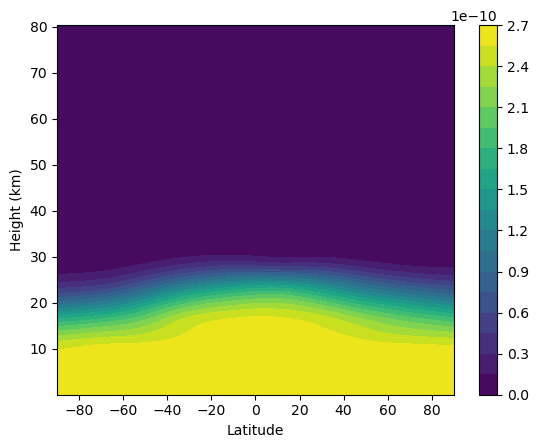

In [37]:
contour = plt.contourf(lat, geom_alt/1000., cfc12_prof_clim, cmap='viridis', levels = 20)

# Add a colorbar
plt.colorbar(contour)

# Set labels for the axes
plt.xlabel('Latitude')
plt.ylabel('Height (km)')